1. Data Understanding and Exploration


In [323]:
import pandas as pd
import numpy as np

In [324]:
df=pd.read_csv('boombike.csv')


In [325]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [326]:
df.shape

(730, 16)

In [327]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [328]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [330]:
# assigning string value to different seasons instead of numeric values

#1=spring

#2=summer

#3=fall

#4=winter

df['season']=df['season'].replace([1,2,3,4],['spring','summer','fall','winter'])

In [331]:
df['season'].astype('category').value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [332]:
df['yr'].astype('category').value_counts()



,count
yr,
0,365
1,365


In [333]:
# assigning string values to different manths instead of numeric values
def object_map_months(x):
  return x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [334]:
df[['mnth']]=df[['mnth']].apply(object_map_months)

In [335]:
df['mnth'].astype('category').value_counts()

,count
mnth,
aug,62
dec,62
jan,62
jul,62
mar,62
may,62
oct,62
apr,60
jun,60


In [336]:
df['holiday'].astype('category').value_counts()

,count
holiday,
0,709
1,21


In [337]:
def str_map_weekday(x):
  return x.map({1:'Mon',2:'Tues',3:'Wed',4:'Thurs',5:'Fri',6:'Sat',0:'Sun'})

In [338]:
df[['weekday']]=df[['weekday']].apply(str_map_weekday)

In [339]:
df['weekday'].astype('category').value_counts()

,count
weekday,
Mon,105
Tues,105
Fri,104
Sat,104
Sun,104
Thurs,104
Wed,104


In [340]:
df['workingday'].astype('category').value_counts()

,count
workingday,
1,504
0,226


In [341]:
# 1=Clear,few clouds,Partly Cloudly
df.loc[(df['weathersit']==1),'weathersit']='A'
# 2=Mist,Cloudly
df.loc[(df['weathersit']==2),'weathersit']='B'
# 3=Light Snow,Light Rain
df.loc[(df['weathersit']==3),'weathersit']='C'

df['weathersit'].astype('category').value_counts()

<ipython-input-341-a73c46807a4a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['weathersit']==1),'weathersit']='A'


,count
weathersit,
A,463
B,246
C,21


2.Data Visualization


In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-343-f349fd45c84e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'])


<Axes: xlabel='temp', ylabel='Density'>

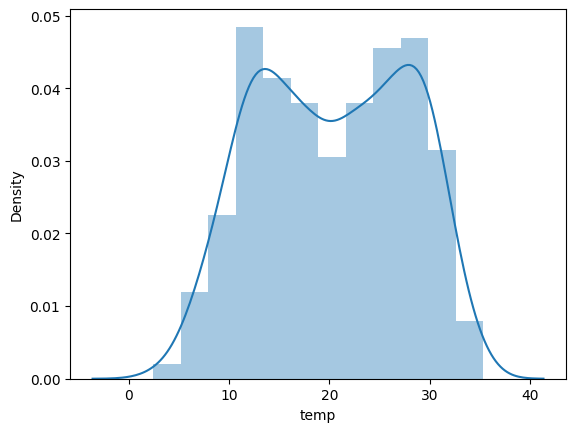

In [343]:
# tempreture
sns.distplot(df['temp'])

<ipython-input-344-e095a61147fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'])


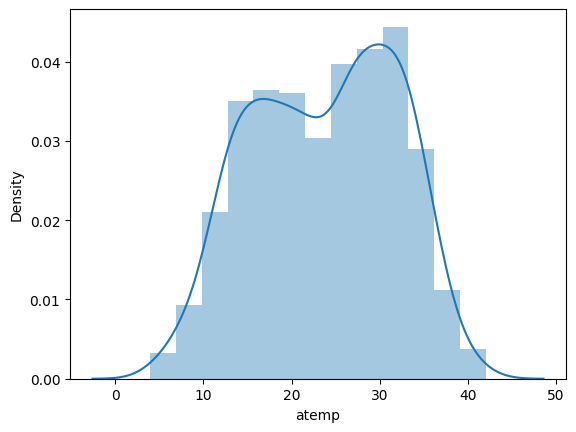

In [344]:
#Actual Tempreture
sns.distplot(df['atemp'])
plt.show()

<ipython-input-345-95e7137f1394>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['windspeed'])


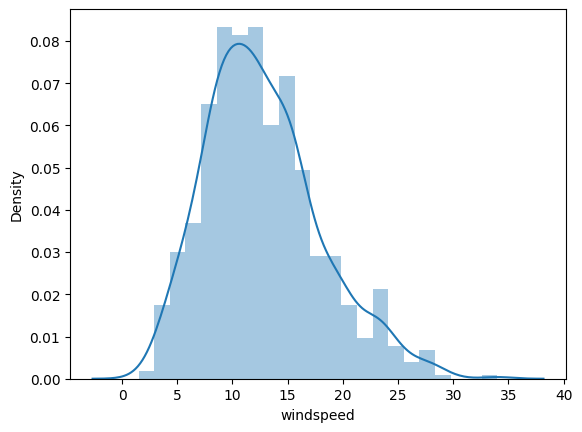

In [345]:
# Wind speed
sns.distplot(df['windspeed'])
plt.show()

<ipython-input-346-8777bdcebf7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'])


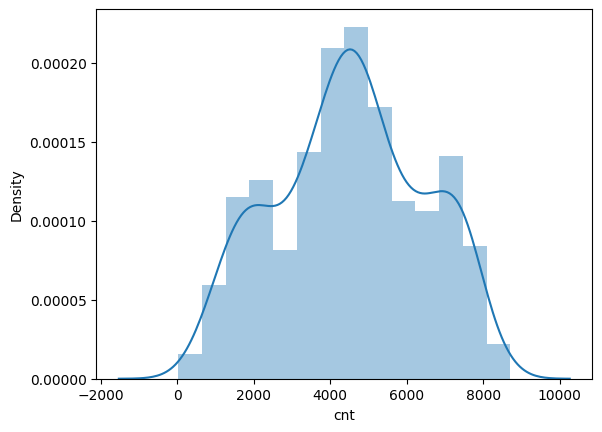

In [346]:
# Target variable : count of total rental bikes including both casual and registerd
sns.distplot(df['cnt'])
plt.show()

In [347]:
# converting date to datetime format
df['dteday']=df['dteday'].astype('datetime64[ns]')

In [348]:
df_categorical=df.select_dtypes(exclude=['Float64','datetime64','int64'])

In [349]:
df_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [350]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,jan,Mon,B
1,spring,jan,Tues,B
2,spring,jan,Wed,A
3,spring,jan,Thurs,A
4,spring,jan,Fri,A
...,...,...,...,...
725,spring,dec,Fri,B
726,spring,dec,Sat,B
727,spring,dec,Sun,B
728,spring,dec,Mon,A


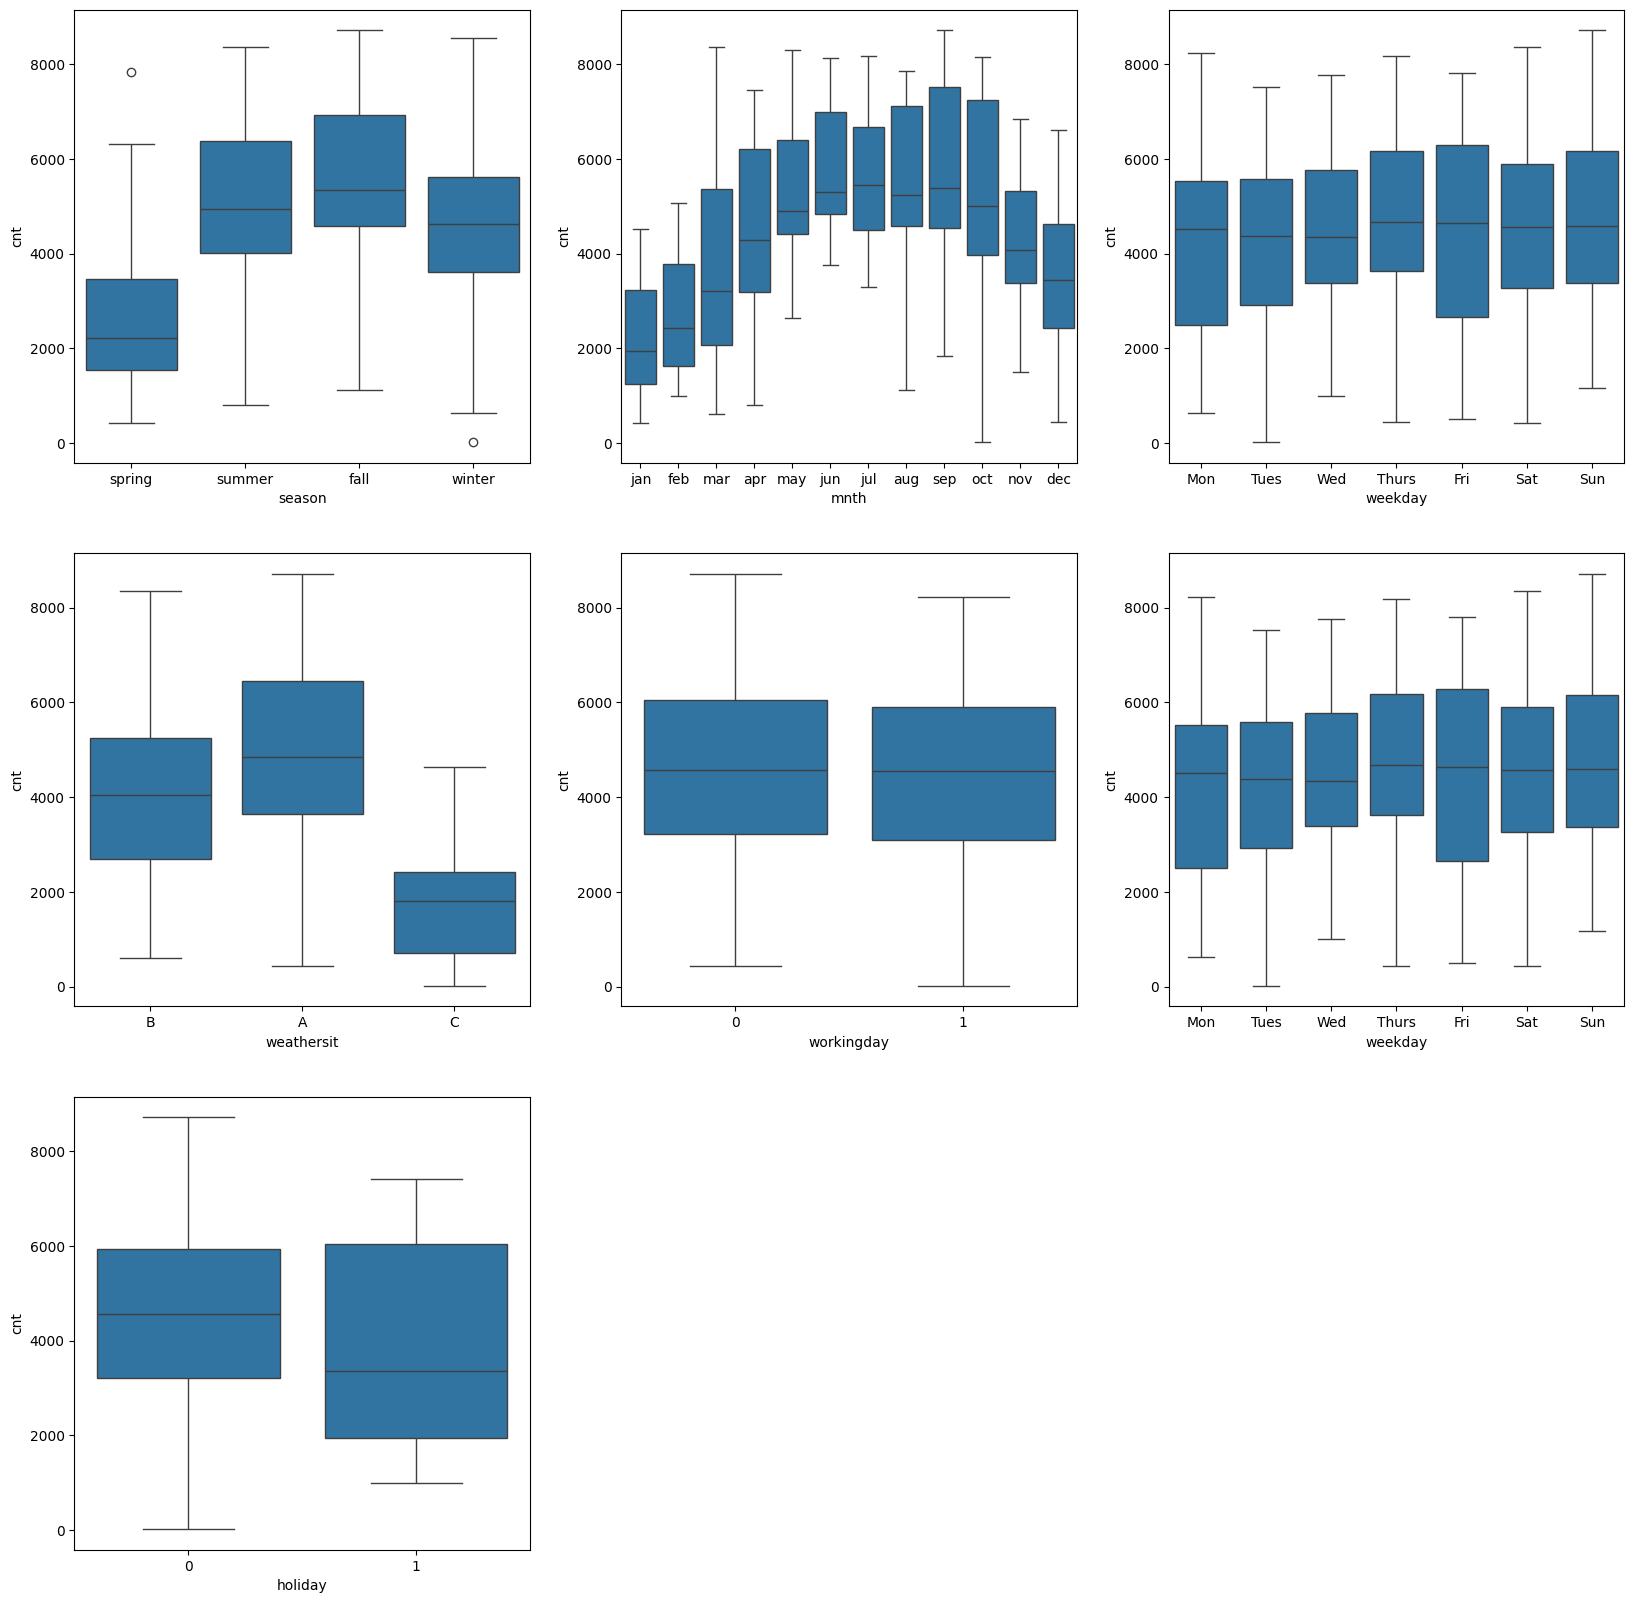

In [351]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.show()

In [352]:
intVarlist=['casual','registered','cnt']

for var in intVarlist:
  df[var]=df[var].astype('float')

In [353]:
df_numeric=df.select_dtypes(include=['float64'])
df_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


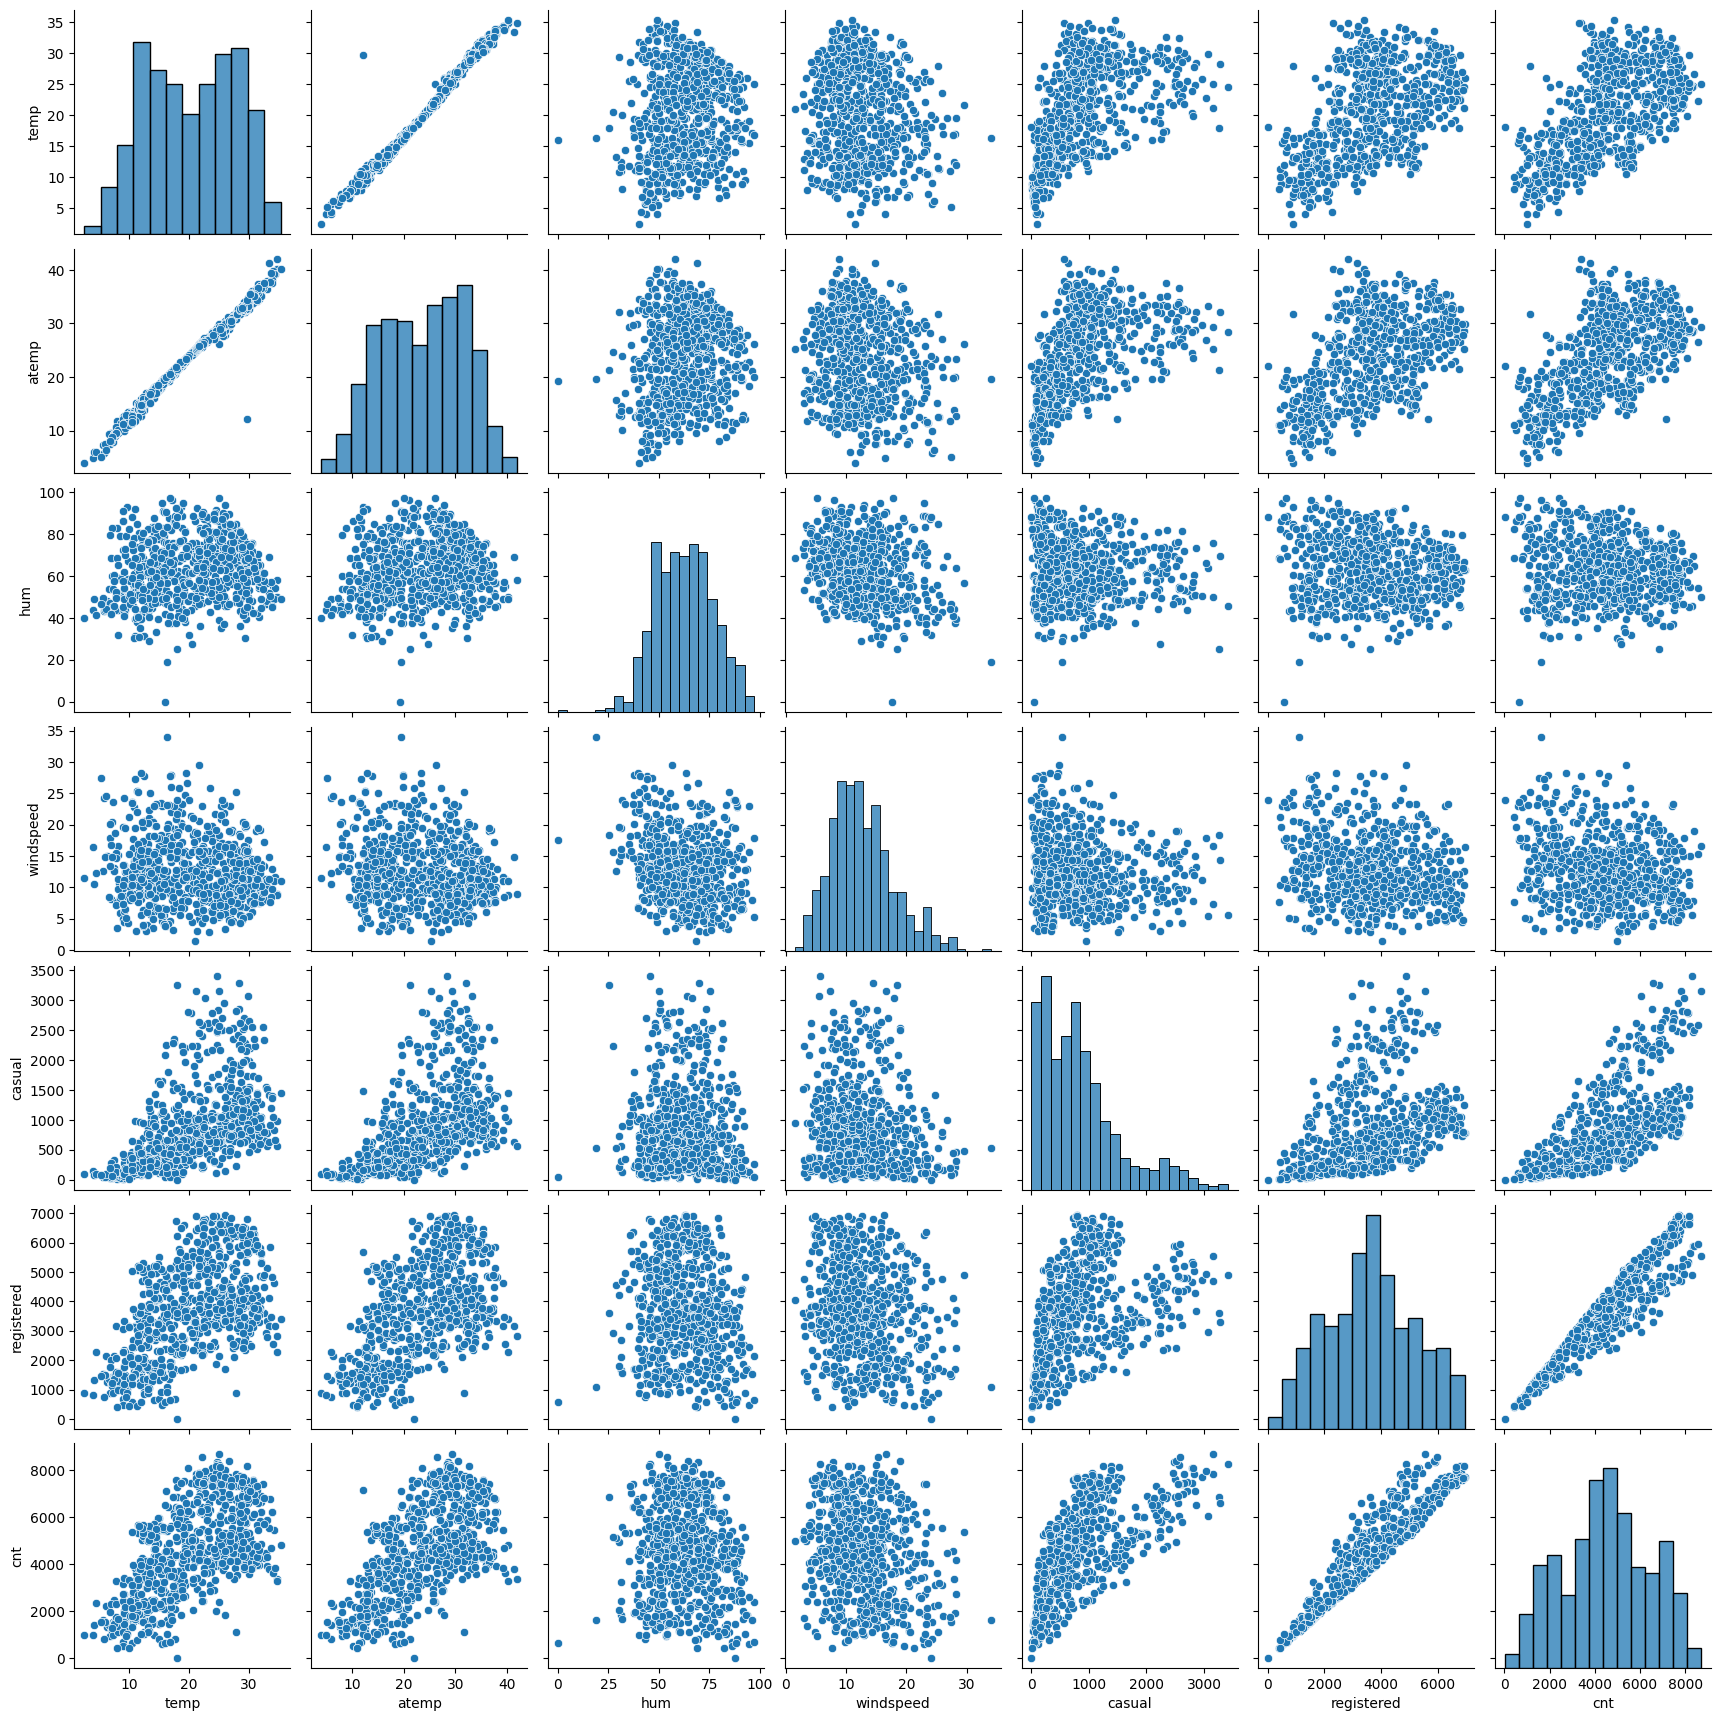

In [354]:
sns.pairplot(df_numeric)
plt.show()

In [355]:
cor=df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


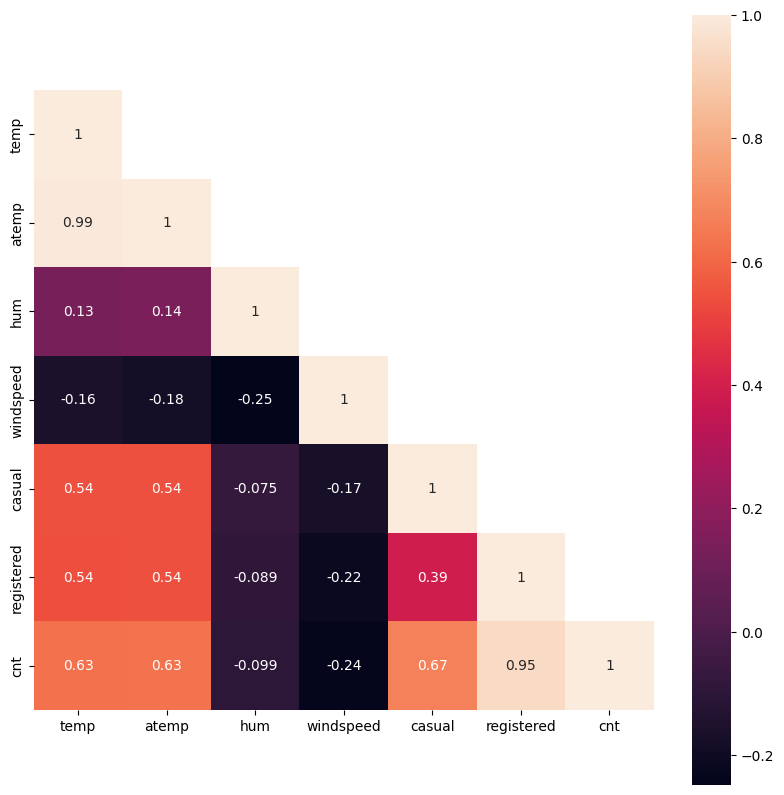

In [356]:
#heatemp
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)
plt.show()

In [357]:
#removinf atemp as it is highly corealed with temp
df.drop('atemp',axis=1,inplace=True)

In [358]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,Mon,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,jan,0,Tues,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,jan,0,Wed,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,jan,0,Thurs,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,jan,0,Fri,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


3.Data Preparation

In [359]:
# Ensure df_categorical has columns with 'object' dtype before applying get_dummies
df_categorical = df.select_dtypes(include=['object'])



In [360]:
df_categorical.head()

,season,mnth,weekday,weathersit
0,spring,jan,Mon,B
1,spring,jan,Tues,B
2,spring,jan,Wed,A
3,spring,jan,Thurs,A
4,spring,jan,Fri,A


In [361]:
df_dummies=pd.get_dummies(df_categorical,drop_first=True,dtype=int)
df_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [362]:
#Drop Categorical variable column
df=df.drop(list(df_categorical.columns),axis=1)
df

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,0,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [363]:
#concatenate dummy variable with the dataset
df=pd.concat([df,df_dummies],axis=1)
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,1,0,0,0,0,0,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,1,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
df=df.drop(['instant','dteday'],axis=1,inplace=False)

In [365]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,0,0,0


4.Model Building and Evaluation

In [388]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [389]:
# split the dataframe into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [390]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,1,0,0,0,0,0,1,0


In [391]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [392]:
# apply scalar to all column expect dummy variable
var=['temp','hum','windspeed','casual','registered','cnt']
df_train[var]=scaler.fit_transform(df_train[var])

In [393]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


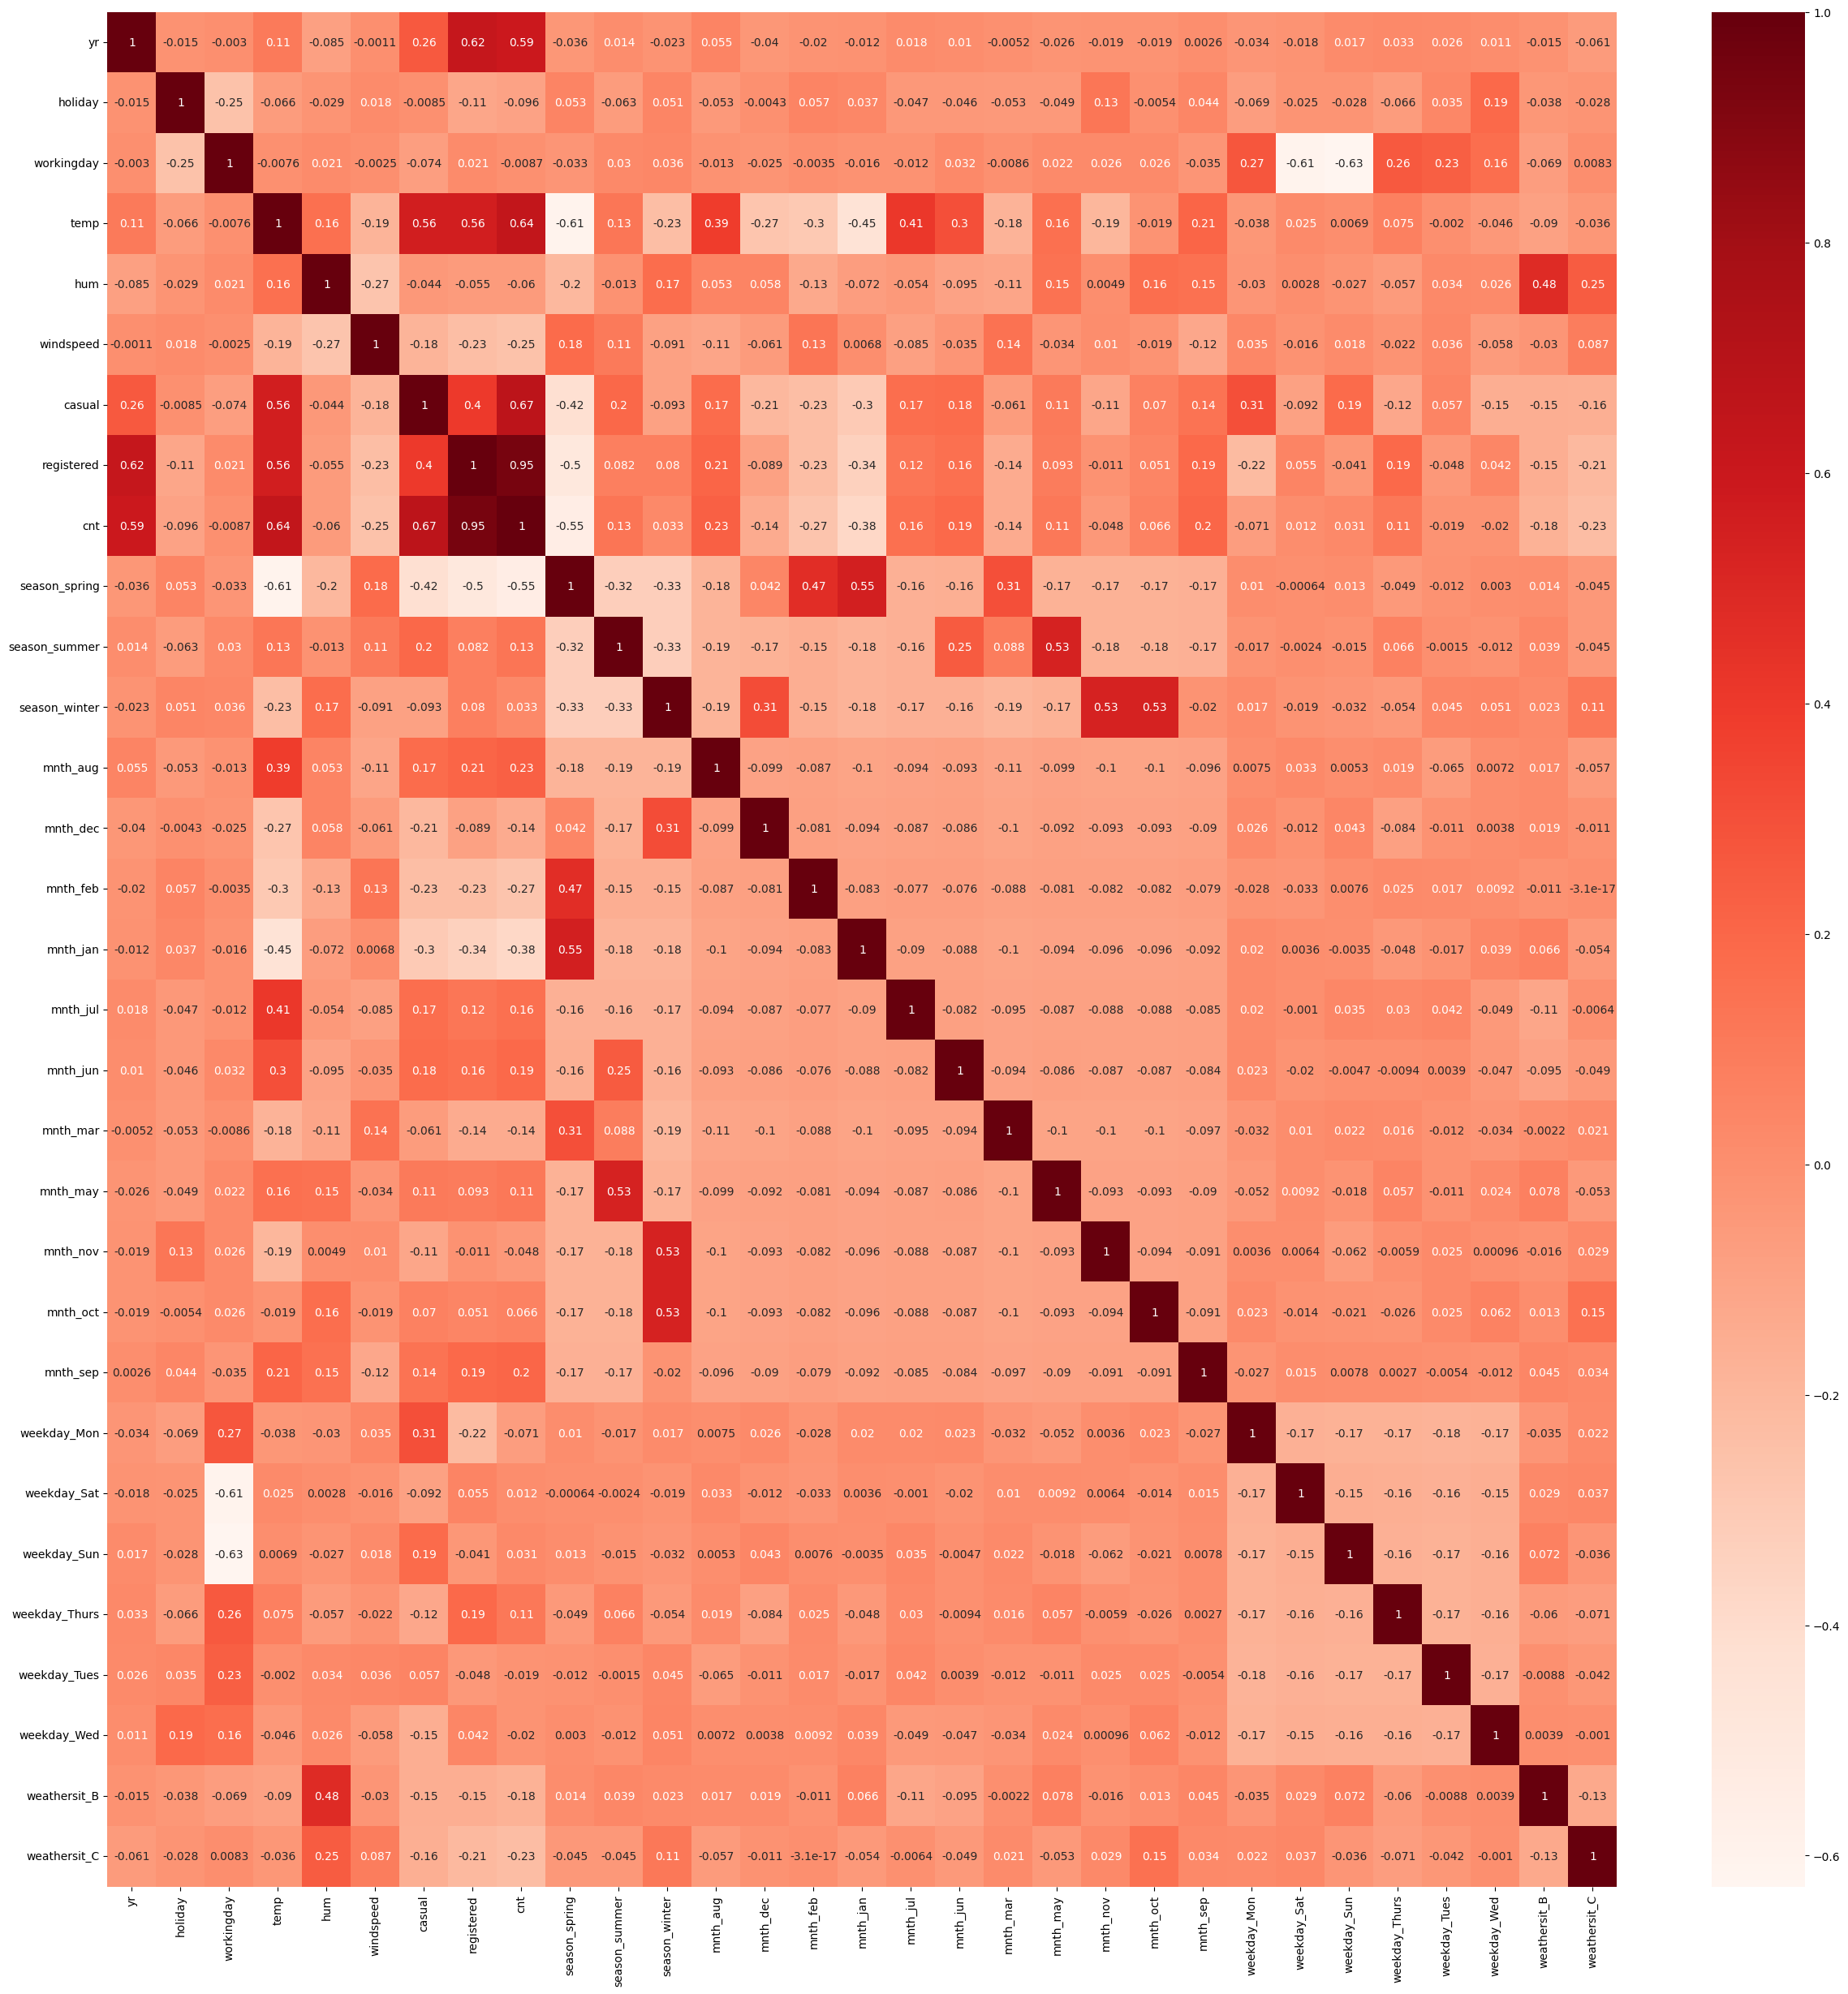

In [394]:
#checking the corelation coefficient to see which variable are highly corelated
plt.figure(figsize=(30,30))
cor=df_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [401]:
#diving into  X and Y
y_train = df_train.pop('cnt')
x_train=df_train.drop(['casual','registered'],axis=1)
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [375]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             510 non-null    int64  
 1   holiday        510 non-null    int64  
 2   workingday     510 non-null    int64  
 3   temp           510 non-null    float64
 4   hum            510 non-null    float64
 5   windspeed      510 non-null    float64
 6   cnt            510 non-null    float64
 7   season_spring  510 non-null    int64  
 8   season_summer  510 non-null    int64  
 9   season_winter  510 non-null    int64  
 10  mnth_aug       510 non-null    int64  
 11  mnth_dec       510 non-null    int64  
 12  mnth_feb       510 non-null    int64  
 13  mnth_jan       510 non-null    int64  
 14  mnth_jul       510 non-null    int64  
 15  mnth_jun       510 non-null    int64  
 16  mnth_mar       510 non-null    int64  
 17  mnth_may       510 non-null    int64  
 18  mnth_nov      

In [431]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()


In [432]:
x_train_lm

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,1,0,...,0,0,0,0,0,0,1,0,1,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,1,0.248216,0.577930,0.431816,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [403]:
lr.params

,0
const,0.394543
yr,0.230857
holiday,-0.135424
workingday,-0.060524
temp,0.445458
hum,-0.157315
windspeed,-0.183046
season_spring,-0.043705
season_summer,0.042243
season_winter,0.110897


In [408]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [409]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.05935514 -0.25151085]
0.39454284834210107


In [410]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          4.33e-179
Time:                        14:03:32   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3945      0.085      4.640      0.000       0.227       0.562
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer     0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter     0.1109      0.028      3.938      0.000       0.056       0.166
mnth_aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_jul         -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_jun          0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_mar          0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_may          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_sep          0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon      -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat      -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun      -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thurs     0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tues     -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed      -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.4
================================================================

In [416]:
from sklearn.feature_selection import RFE


In [447]:
lm=LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=15)

rfel.fit(x_train,y_train)
print(rfel.support_)
print(rfel.ranking_)

[ True  True False  True  True  True  True  True  True False False False
  True  True False False False  True False  True False False False False
 False False  True  True]
[ 1  1  4  1  1  1  1  1  1 10  2  3  1  1 14 15  7  1 12  1  9  5  6 13
  8 11  1  1]


In [424]:
col1=x_train.columns[rfel.support_]

In [425]:
col1

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [429]:
x_train_rfe1=x_train[col1]
x_train_rfe1=sm.add_constant(x_train_rfe1)
lm1=sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.25e-189
Time:                        14:17:29   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3030      0.035      8.597      0.000       0.234       0.372
yr                0.2301      0.008     28.386      0.000       0.214       0.246
holiday          -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp              0.5052      0.035     14.369      0.000       0.436       0.574
hum              -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed        -0.1854      0.026     -7.179      0.000      -0.236      -0.135
season_spring    -0.0564      0.021     -2.664      0.008      -0.098      -0.015
season_summer     0.0466      0.015      3.080      0.002       0.017       0.076
season_winter     0.0986      0.018      5.519      0.000       0.064       0.134
mnth_jan         -0.0339      0.018     -1.929      0.054      -0.068       0.001
mnth_jul         -0.0562      0.018     -3.076      0.002      -0.092      -0.020
mnth_nov         -0.0253      0.017     -1.463      0.144      -0.059       0.009
mnth_sep          0.0798      0.017      4.755      0.000       0.047       0.113
weathersit_B     -0.0543      0.010     -5.182      0.000      -0.075      -0.034
weathersit_C     -0.2418      0.026     -9.187      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [436]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [437]:
a=x_train_rfe1.drop('const',axis=1)

In [438]:
vif=pd.DataFrame()
vif['Features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,29.12
2,temp,16.80
4,windspeed,4.71
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.79
12,weathersit_B,2.29
0,yr,2.09
8,mnth_jan,1.67
9,mnth_jul,1.59


In [450]:
lm=LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)

rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2 11  1  1  1  1  6  3 17  9 10  7  1 21 22 14  8 19  4 16 12 13 20
 15 18  5  1]


In [451]:
col2=x_train.columns[rfe2.support_]
x_train_rfe2=x_train[col2]
x_train_rfe2=sm.add_constant(x_train_rfe2)
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.34e-178
Time:                        14:30:36   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [452]:
b=x_train_rfe2.drop('const',axis=1)
vif1=pd.DataFrame()
vif1['Features']=b.columns
vif1['VIF']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_jul,1.35
6,weathersit_C,1.11


In [453]:
y_train_cnt=lm2.predict(x_train_rfe2)

<ipython-input-458-55f639ad2852>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train,y_train_cnt),bins=20)


<Axes: ylabel='Density'>

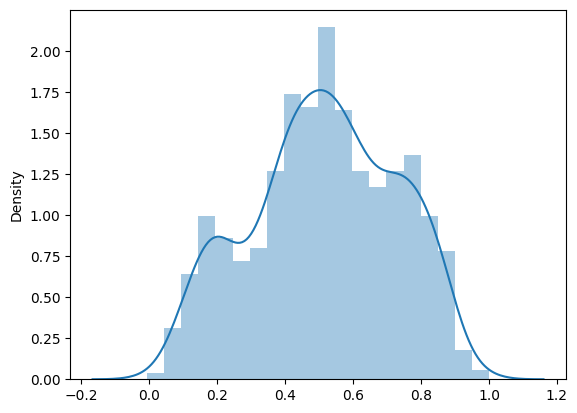

In [458]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)


In [459]:
df_test[var]=scaler.transform(df_test[var])

In [460]:
y_test=df_test.pop('cnt')
x_test=df_test.drop(['casual','registered'],axis=1)


In [461]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [462]:
c=x_train_rfe2.drop('const',axis=1)

In [464]:
col2=c.columns

In [465]:
x_test_rfe2=x_test[col2]

In [466]:
x_test_rfe2=sm.add_constant(x_test_rfe2)

In [467]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   hum            219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    int64  
 6   mnth_jul       219 non-null    int64  
 7   weathersit_C   219 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 15.4 KB


In [468]:
y_predict=lm2.predict(x_test_rfe2)

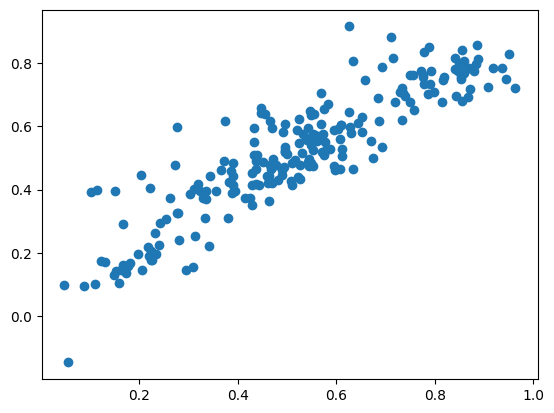

In [469]:
plt.figure()
plt.scatter(y_test,y_predict)


In [470]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.805237966729835

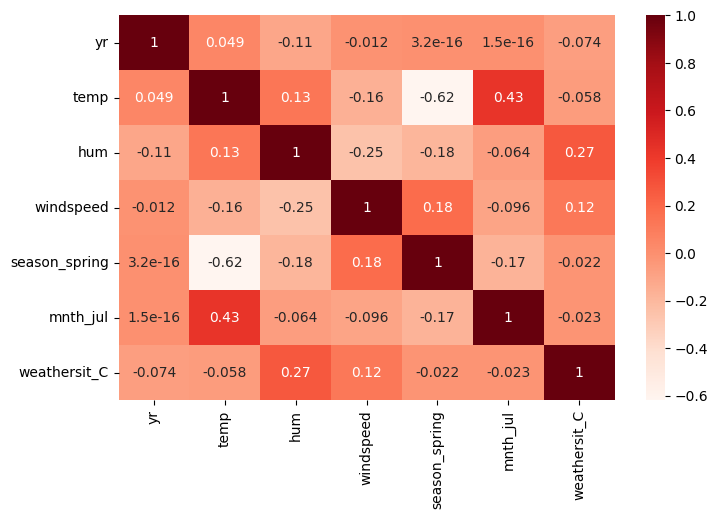

In [474]:
plt.figure(figsize=(8,5))
sns.heatmap(df[col2].corr(),cmap=plt.cm.Reds,annot=True)
plt.show()